# Hello Soft Clustering (GMM)

In [12]:
import numpy as np
from numpy import linalg as linalg
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

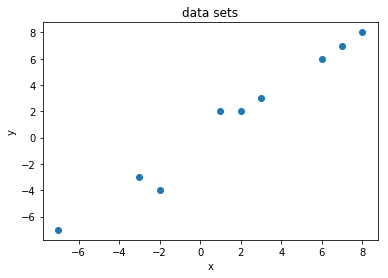

In [2]:
data = [[1,2],[3,3],[2,2],[8,8],[6,6],[7,7],[-3,-3],[-2,-4],[-7,-7]]
data = np.array(data)
plt.scatter(data[:,0], data[:,1])
plt.title('data sets')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
def gaussian(x, miu, cov):
    z = (x-miu).T.dot(linalg.inv(cov)).dot(x-miu)
    return 1/(2 * np.pi * math.sqrt(linalg.det(cov))) * np.exp(-0.5 * z)

def expectationstep(data, mean, cov, weight):
    w = {}
    for n in range(data.shape[0]):
        den = 0
        for j in range(mean.shape[0]):
            w[n,j] = gaussian(data[n], mean[j], cov[j]) * weight[j]
            den += w[n,j]
        for j in range(mean.shape[0]):
            w[n,j] /= den
    return w

def maximizationstep(data, mean, cov, w):
    m = []
    miu = []
    sigma = []
    for j in range(mean.shape[0]):
        sum_w = 0
        num_miu = 0
        num_sigma = np.zeros(cov[0].shape)
        for n in range(data.shape[0]):
            sum_w += w[n,j]
            num_miu += w[n,j] * data[n]
            diff = (data[n]-mean[j]).reshape(2,1)
            num_sigma += w[n,j] * diff.dot(diff.T)
        m.append(sum_w / data.shape[0])
        miu.append(num_miu / sum_w)
        sigma.append(num_sigma / sum_w)
    sigma = np.array([np.diag(np.diag(x)) for x in sigma])
    return np.array(m), np.array(miu), sigma

def plotGaussians(mean, cov, data):
    x, y = np.mgrid[-7:9:.01, -7:9:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = {}
    for i in range(len(mean)):
        rv = multivariate_normal(mean[i], cov[i])
        plt.contour(x, y, rv.pdf(pos))
    plt.scatter(data[:,0], data[:,1], c = 'black')
    plt.show()
    
def loglike(data, weight, mean, cov):
    loglike = 0
    for n in range(data.shape[0]):
        prob = 0
        for j in range(mean.shape[0]):
            prob += gaussian(data[n], mean[j], cov[j]) * weight[j]
        loglike += np.log(prob)
    return loglike

given data sets
μ: 
[[ 3  3]
 [ 2  2]
 [-3 -3]]
Σ: 
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
φ: [0.33333333 0.33333333 0.33333333]


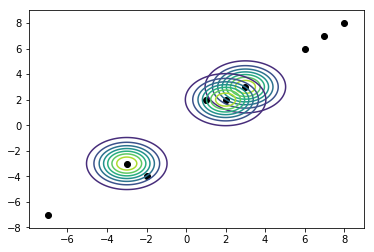

iteration round 1
prob: 
[0.11920292180570964, 0.8807970763788322, 1.815458084611521e-09]
[0.7310585786300048, 0.2689414213699951, 1.69570706337771e-16]
[0.2689414213672646, 0.7310585786225826, 1.0152900501910814e-11]
[0.9999832985781519, 1.6701421848095184e-05, 2.0310587405994382e-42]
[0.9990889488055994, 0.0009110511944006453, 5.375284534993953e-32]
[0.9998766054240137, 0.00012339457598623172, 3.3052927212335583e-37]
[2.3195228302113555e-16, 1.388794386477114e-11, 0.9999999999861118]
[2.319522830211355e-16, 1.3887943864771144e-11, 0.9999999999861118]
[3.3057006267607348e-37, 5.900090541597062e-29, 1.0]
μ: 
[[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
Σ: 
[[[12.31988634  0.        ]
  [ 0.         12.23304914]]

 [[ 0.62066718  0.        ]
  [ 0.          0.15261824]]

 [[ 5.66666667  0.        ]
  [ 0.          5.66666668]]]
φ: [0.45757242 0.20909425 0.33333333]
loglike:  -42.10307442013231


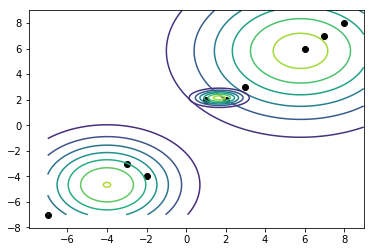

iteration round 2
prob: 
[0.0181294621935794, 0.9815829978048423, 0.00028754000157841814]
[0.5644940614601113, 0.43538062195584154, 0.0001253165840471524]
[0.019284694324428982, 0.9806335009045655, 8.18047710055622e-05]
[0.9999999999949608, 4.708266849834785e-62, 5.039159779133251e-12]
[0.9999999898249619, 3.822838980144731e-27, 1.0175038152685768e-08]
[0.9999999997509935, 7.32691443566828e-43, 2.4900649426206484e-10]
[0.0015979515195400566, 7.697530185578982e-45, 0.99840204848046]
[0.0015506975301093412, 5.8961211811095866e-58, 0.9984493024698907]
[3.5909124315408632e-06, 1.89005654069029e-144, 0.9999964090875685]
μ: 
[[ 6.30842698  6.31259558]
 [ 1.77218759  2.1815904 ]
 [-4.00062813 -4.66675525]]
Σ: 
[[[3.24482139 0.        ]
  [0.         3.18737779]]

 [[0.54812076 0.        ]
  [0.         0.14993733]]

 [[4.67362081 0.        ]
  [0.         2.89766742]]]
φ: [0.40056227 0.26639968 0.33303805]
loglike:  -38.54343920672342


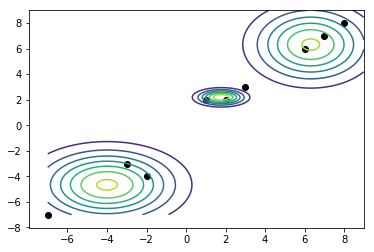

iteration round 3
prob: 
[0.00018124025145923122, 0.9998127361408897, 6.023607651139258e-06]
[0.14077012802223282, 0.8592292293145521, 6.42663215076906e-07]
[0.00048532472415771196, 0.9995135456893327, 1.129586509562114e-06]
[1.0, 7.30562640143462e-64, 3.402717518793653e-19]
[0.9999999999999497, 4.882748721046808e-28, 5.023425629291307e-14]
[0.9999999999999998, 3.0586702893129033e-44, 1.2669675188143182e-16]
[4.859801382718605e-12, 2.2909257809010993e-47, 0.9999999999951402]
[3.112606080128109e-12, 1.7898602032767149e-60, 0.9999999999968875]
[1.0917283429454344e-23, 1.827398071701569e-151, 1.0]
μ: 
[[ 6.81963839  6.81969608]
 [ 1.95082009  2.30058161]
 [-3.9999862  -4.66664913]]
Σ: 
[[[1.58836939 0.        ]
  [0.         1.58356938]]

 [[0.67983404 0.        ]
  [0.         0.22439122]]

 [[4.6667292  0.        ]
  [0.         2.88899996]]]
φ: [0.34904852 0.31761728 0.3333342 ]
loglike:  -36.19157145495559


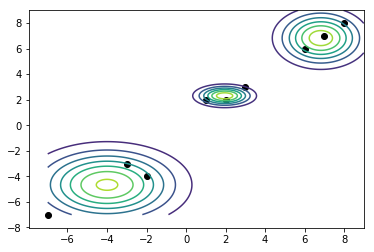

In [43]:
mean = np.array([[3,3], [2,2], [-3, -3]])
cov = np.array([np.identity(2), np.identity(2), np.identity(2)])
weight = np.array([1/3, 1/3, 1/3])

print('given data sets')
print('μ: ')
print(mean)
print('Σ: ')
print(cov)
print('φ:', weight)
plotGaussians(mean, cov, data)
for i in range(3):
    print('iteration round', i+1)
    w = expectationstep(data, mean, cov, weight)
    weight, mean, cov = maximizationstep(data, mean, cov, w)
    print('prob: ')
    for i in range(9):
        print([w[i,0], w[i,1], w[i,2]])
    print('μ: ')
    print(mean)
    print('Σ: ')
    print(cov)
    print('φ:', weight)
    print('loglike: ', loglike(data, weight, mean, cov))
    plotGaussians(mean, cov, data)

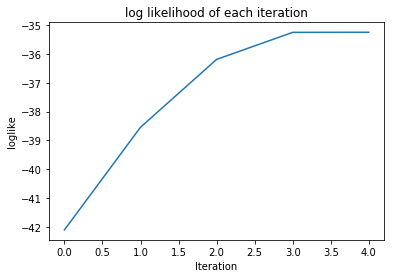

In [56]:
mean = np.array([[3,3], [2,2], [-3, -3]])
cov = np.array([np.identity(2), np.identity(2), np.identity(2)])
weight = np.array([1/3, 1/3, 1/3])

ll = []
for i in range(5):
    w = expectationstep(data, mean, cov, weight)
    weight, mean, cov = maximizationstep(data, mean, cov, w)
    ll.append(loglike(data, weight, mean, cov))
plt.plot(np.arange(len(ll)),np.array(ll))
plt.title('log likelihood of each iteration')
plt.xlabel('Iteration')
plt.ylabel('loglike')
plt.show()

given data sets
μ: 
[[ 3  3]
 [-3 -3]]
Σ: 
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
φ: [0.5 0.5]


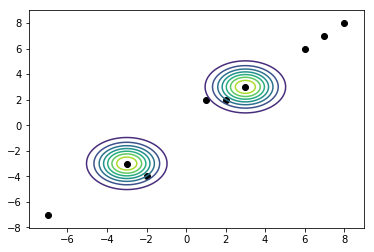

iteration round 1
prob: 
[0.9999999847700205, 1.5229979512760346e-08]
[0.9999999999999998, 2.319522830243569e-16]
[0.9999999999622486, 3.775134544136581e-11]
[1.0, 2.031092662734811e-42]
[1.0, 5.380186160021138e-32]
[1.0, 3.3057006267607348e-37]
[2.319522830243569e-16, 0.9999999999999998]
[2.3195228302435686e-16, 0.9999999999999998]
[3.3057006267607348e-37, 1.0]
μ: 
[[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
Σ: 
[[[9.16666668 0.        ]
  [0.         8.66666669]]

 [[5.66666672 0.        ]
  [0.         5.66666677]]]
φ: [0.66666666 0.33333334]
loglike:  -46.88887010186105


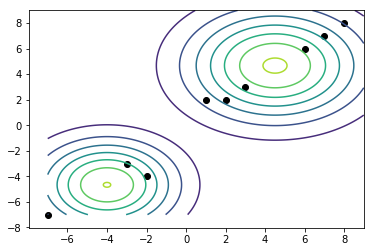

iteration round 2
prob: 
[0.994979696065971, 0.0050203039340289135]
[0.999922645874199, 7.735412580097546e-05]
[0.9986238560027603, 0.0013761439972398094]
[0.9999999999937206, 6.2793389065934546e-12]
[0.9999999936681453, 6.3318548151439855e-09]
[0.999999999787373, 2.1262699331145752e-10]
[0.0027713240935987615, 0.9972286759064013]
[0.0024590878233261212, 0.9975409121766738]
[1.3021775089462056e-06, 0.9999986978224912]
μ: 
[[ 4.49739004  4.66243446]
 [-3.9912655  -4.65434481]]
Σ: 
[[[6.94971903 0.        ]
  [0.         5.94046426]]

 [[4.72011919 0.        ]
  [0.         2.98099996]]]
φ: [0.66652866 0.33347134]
loglike:  -46.29297528619903


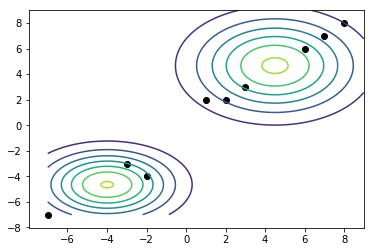

iteration round 3
prob: 
[0.9998405724388288, 0.00015942756117116646]
[0.9999996130890562, 3.8691094374641263e-07]
[0.9999676360281838, 3.2363971816191025e-05]
[1.0, 2.7785507794124094e-18]
[0.9999999999998387, 1.6129813885685786e-13]
[0.9999999999999992, 7.52961598234109e-16]
[0.00025642402616808045, 0.999743575973832]
[0.00016541327854370657, 0.9998345867214564]
[6.055501890912801e-09, 0.9999999939444981]
μ: 
[[ 4.49960686  4.66618544]
 [-3.99986439 -4.66641867]]
Σ: 
[[[6.9196161  0.        ]
  [0.         5.89303254]]

 [[4.66851519 0.        ]
  [0.         2.89184297]]]
φ: [0.66669218 0.33330782]
loglike:  -46.29195955411725


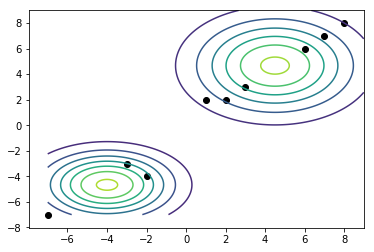

In [65]:
mean = np.array([[3,3], [-3,-3]])
cov = np.array([np.identity(2), np.identity(2)])
weight = np.array([1/2, 1/2])

print('given data sets')
print('μ: ')
print(mean)
print('Σ: ')
print(cov)
print('φ:', weight)
plotGaussians(mean, cov, data)
for i in range(3):
    print('iteration round', i+1)
    w = expectationstep(data, mean, cov, weight)
    weight, mean, cov = maximizationstep(data, mean, cov, w)
    print('prob: ')
    for i in range(9):
        print([w[i,0], w[i,1]])
    print('μ: ')
    print(mean)
    print('Σ: ')
    print(cov)
    print('φ:', weight)
    print('loglike: ', loglike(data, weight, mean, cov))
    plotGaussians(mean, cov, data)

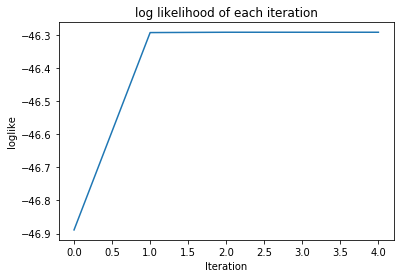

In [66]:
mean = np.array([[3,3], [-3, -3]])
cov = np.array([np.identity(2), np.identity(2)])
weight = np.array([1/3, 1/2])

ll = []
for i in range(5):
    w = expectationstep(data, mean, cov, weight)
    weight, mean, cov = maximizationstep(data, mean, cov, w)
    ll.append(loglike(data, weight, mean, cov))
plt.plot(np.arange(len(ll)),np.array(ll))
plt.title('log likelihood of each iteration')
plt.xlabel('Iteration')
plt.ylabel('loglike')
plt.show()

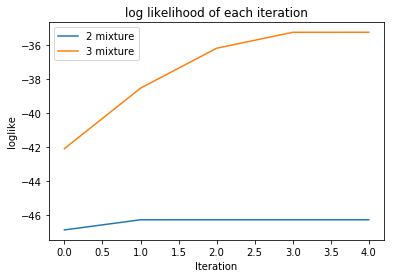

In [68]:
mean = np.array([[3,3], [-3, -3]])
cov = np.array([np.identity(2), np.identity(2)])
weight = np.array([1/3, 1/2])

ll = []
for i in range(5):
    w = expectationstep(data, mean, cov, weight)
    weight, mean, cov = maximizationstep(data, mean, cov, w)
    ll.append(loglike(data, weight, mean, cov))
plt.plot(np.arange(len(ll)),np.array(ll))

mean = np.array([[3,3], [2,2], [-3, -3]])
cov = np.array([np.identity(2), np.identity(2), np.identity(2)])
weight = np.array([1/3, 1/3, 1/3])

ll = []
for i in range(5):
    w = expectationstep(data, mean, cov, weight)
    weight, mean, cov = maximizationstep(data, mean, cov, w)
    ll.append(loglike(data, weight, mean, cov))
plt.plot(np.arange(len(ll)),np.array(ll))

plt.title('log likelihood of each iteration')
plt.xlabel('Iteration')
plt.ylabel('loglike')
plt.legend(['2 mixture', '3 mixture'])
plt.show()

# The face database

### no projection

In [13]:
from skimage import img_as_float
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io
x = scipy.io.loadmat('/Users/chompk/WORK/CU_ISE/3rd year/pattern recognition/hw/hw3/facedata.mat')

In [14]:
# xf dimension 40x10
# each row represent each person
# each column represent each person's picture
xf = {}
for i in range(x['facedata'].shape[0]):
    for j in range(x['facedata'].shape[1]):
        xf[i,j] = img_as_float(x['facedata'][i,j])

In [15]:
def eud_dis(x1, x2):
    return np.sum((x1-x2)**2)**0.5

In [16]:
print('distance between xf[0,0] to xf[0,1] = ', eud_dis(xf[0,0], xf[0,1]))
print('distance between xf[0,0] to xf[1,0] = ', eud_dis(xf[0,0], xf[1,0]))

distance between xf[0,0] to xf[0,1] =  10.037616294165492
distance between xf[0,0] to xf[1,0] =  8.173295099737281


In [17]:
def get_T_D(data):
    T = []
    D = []
    for i in range(40):
        for j in range(3):
            T.append(data[i,j].reshape(2576))
        for j in range(3,10):
            D.append(data[i,j].reshape(2576))
    return np.array(T), np.array(D)

In [18]:
T,D = get_T_D(xf)

In [19]:
def get_similarity(T,D):
    similarity = []
    for i in range(T.shape[0]):
        row = []
        for j in range(D.shape[0]):
            row.append(eud_dis(T[i], D[j]))
        similarity.append(row)
    return np.array(similarity)

In [20]:
similarity = get_similarity(T,D)

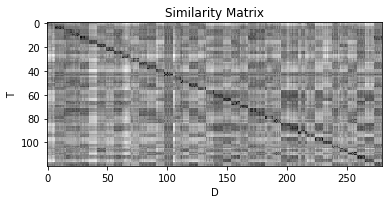

In [21]:
plt.imshow(similarity, cmap='gray')
plt.xlabel('D')
plt.ylabel('T')
plt.title('Similarity Matrix')
plt.show()

In [22]:
def face_ver(similarity, t):
    tp = tn = fn = fp = 0
    for i in range(0,similarity.shape[0],3):
        for j in range(similarity.shape[1]):
            dmin = min(similarity[i,j], similarity[i+1, j], similarity[i+2, j])
            if i // 3 == j // 7:
                if dmin < t:
                    tp += 1
                else:
                    fn += 1
            else:
                if dmin < t:
                    fp += 1
                else:
                    tn += 1
    return tp/(tp+fn), fp/(tn+fp)

In [23]:
tpr, far = face_ver(similarity, 10)
print('true positive rate = ', tpr)
print('false alarm rate = ', far)

true positive rate =  0.9964285714285714
false alarm rate =  0.4564102564102564


In [24]:
def plotRoC(similarity):
    tmin = np.min(similarity)
    tmax = np.max(similarity)

    tpr_y = []
    far_x = []
    d = 1
    dmin = 1
    recall = 0
    th = np.arange(tmin, tmax, (tmax-tmin)/1000)
    for t in th:
        y, x = face_ver(similarity, t)
        tpr_y.append(y)
        far_x.append(x)
        if abs(1-y-x) < d:
            EER = x
            d = abs(1-y-x)
        if abs(x-0.001) < dmin:
            recall = y
            dmin = abs(x-0.001)
    plt.plot(np.array(far_x), np.array(tpr_y))
    plt.plot(np.arange(0,1,0.001), 1-np.arange(0,1,0.001))
    print('EER = ', EER)
    print('recall at 0.1% = ', recall)
    plt.title('RoC curve')
    plt.xlabel('False alarm rate')
    plt.ylabel('True positive rate')
    plt.legend(['RoC', 'EER'])
    plt.show()

EER =  0.09001831501831502
recall at 0.1% =  0.5464285714285714


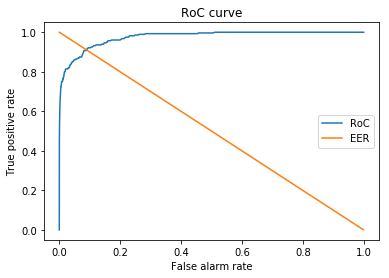

In [25]:
plotRoC(similarity)

### PCA

#### Find eigenvectors, eigenvalues

In [26]:
T,D = get_T_D(xf)

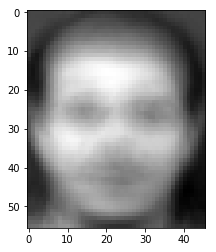

In [27]:
meanface = np.zeros(2576)
for data in T:
    meanface += data
meanface /= 120
plt.imshow(meanface.reshape(56,46), cmap='gray')
plt.show()

In [28]:
X_hat = (T - meanface).T

In [29]:
gram = X_hat.T.dot(X_hat)

In [30]:
eig_val, eig_vec = np.linalg.eigh(gram)

In [31]:
# sort eigenvalue decending
eig_val = eig_val[::-1]
# flip eigenvector as eigenvalue
# flip horizontally(first to last column) as eigenvector is column matrix
eig_vec = eig_vec[:, ::-1]
# np.linalg.eigh already normalize eigenvectors

In [32]:
count = 0
for val in eig_val:
    if val < 1e-5:
        count += 1
print('number of non-zero eigenvalue = ', eig_val.shape[0]-count)

number of non-zero eigenvalue =  119


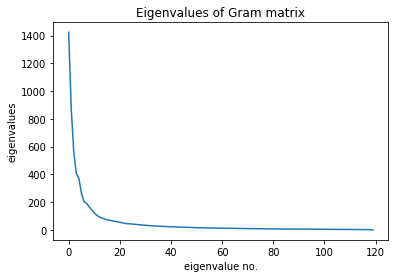

In [33]:
plt.plot(eig_val)
plt.title('Eigenvalues of Gram matrix')
plt.xlabel('eigenvalue no.')
plt.ylabel('eigenvalues')
plt.show()

In [34]:
count_eigval = 0
sum_eigval = 0
for val in eig_val:
    if val < 1e-5:
        continue
    if sum_eigval/np.sum(eig_val) < 0.95:
        sum_eigval += val
        count_eigval += 1
print('There are', count_eigval, 'eigenvalues/eigenvectors required')

There are 64 eigenvalues/eigenvectors required


In [35]:
v = X_hat.dot(eig_vec)
norm_mat = []
for i in range(v.shape[1]):
    v[:,i] = v[:,i] / np.linalg.norm(v.T[i])

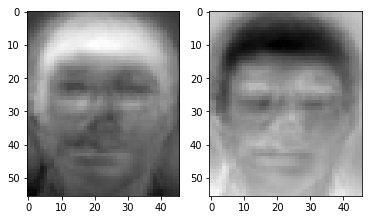

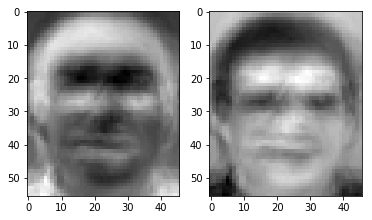

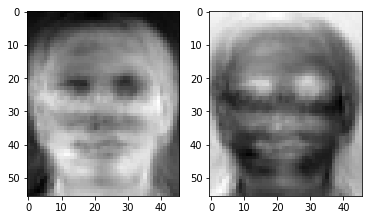

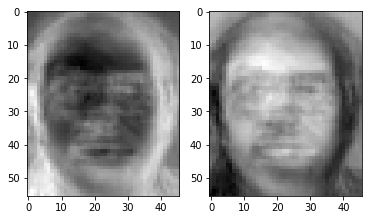

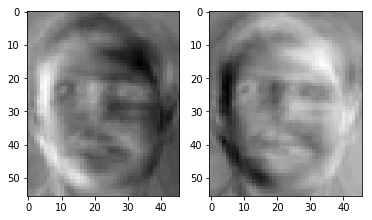

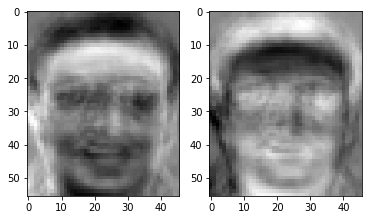

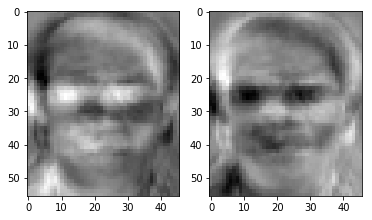

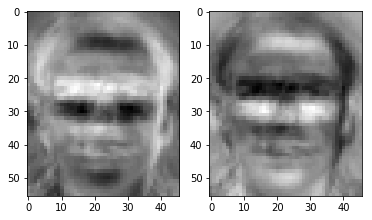

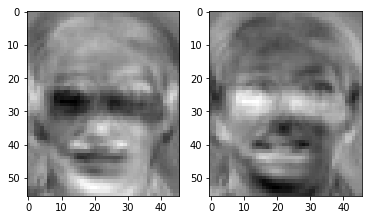

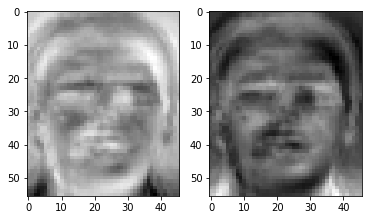

In [103]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1,2)
    img = v.T[i].reshape(56,46)
    ax1.imshow(img, cmap='gray')
    ax2.imshow(img, cmap='gray_r')

#### compress - reconstruct

k =  1
MSE =  0.018486954509692028


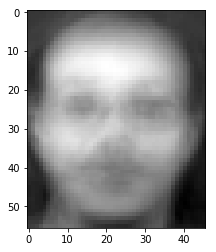

k =  2
MSE =  0.016232644731309896


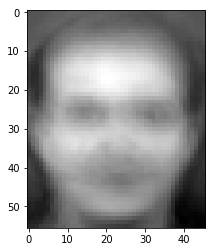

k =  3
MSE =  0.010083926809950055


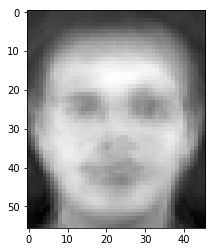

k =  4
MSE =  0.010083926132523669


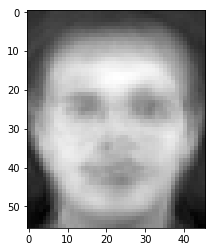

k =  5
MSE =  0.010061224016363009


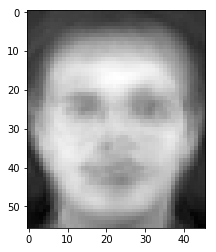

k =  6
MSE =  0.009344143686155576


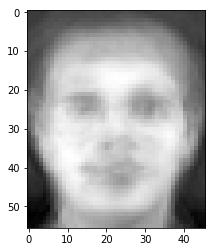

k =  7
MSE =  0.008871378021262763


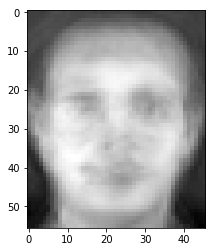

k =  8
MSE =  0.008254991781399039


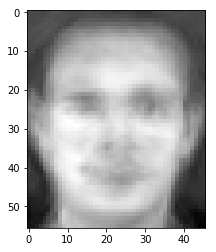

k =  9
MSE =  0.0063989621684515646


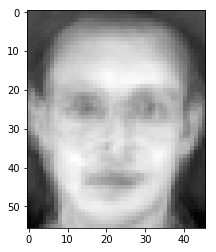

k =  10
MSE =  0.006148335016488305


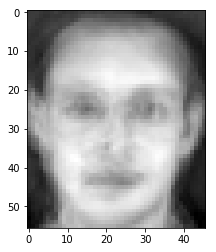

k =  119
MSE =  9.265562235788005e-31


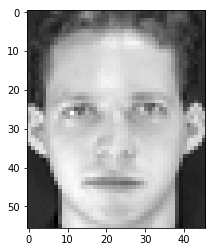

In [212]:
mse = []
for k in range(1,120):
    # compress
    p = []
    for i in range(X_hat.shape[1]):
        p.append(v.T[0:k,:].dot(X_hat[:,i]))
    p = np.array(p)

    # reconstruct
    X_recon = []
    for pi in p:
        X_recon.append(v[:,0:k].dot(pi)+meanface)
    X_recon = np.array(X_recon)
    X = xf[0,0].reshape(2576)
    MSE = np.sum((X-X_recon[0])**2) / X.shape[0]
    mse.append(MSE)
    
    if k in [1,2,3,4,5,6,7,8,9,10,119]:
        print('k = ',k)
        print('MSE = ', MSE)
        plt.imshow(X_recon[0].reshape(56,46), cmap='gray')
        plt.show()

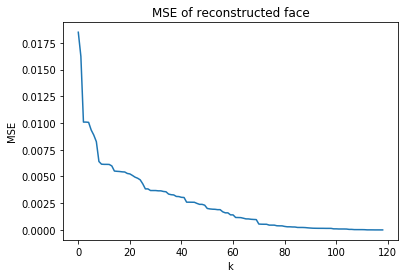

In [213]:
plt.plot(mse)
plt.title('MSE of reconstructed face')
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

# LDA

In [214]:
T, D = get_T_D(xf)
lda_t = []
lda_d = []
# PCA projection
k = 80
for i in range(X_hat.shape[1]):
    lda_t.append(v.T[0:k,:].dot(X_hat[:,i]))
    
for i in range(D.shape[0]):
    lda_d.append(v.T[0:k,:].dot((D-meanface).T[:,i]))
lda_t = np.array(lda_t)
lda_d = np.array(lda_d)

In [215]:
def class_mean(j):
    mean = np.zeros(80)
    for i in range(3):
        mean += lda_t[3*j+i]
    return (mean/3).reshape(80,1)

In [216]:
global_mean = 0
for i in range(lda_t.shape[0]):
    global_mean += p[i]
global_mean /= p.shape[0]

In [217]:
Sb = 0
for i in range(40):
    diff = class_mean(i)-global_mean
    Sb += diff.dot(diff.T)

In [218]:
Sw = 0
for i in range(40):
    for j in range(3):
        diff = lda_t[3*i + j].reshape(80,1)-class_mean(i)
        Sw += (diff).dot(diff.T)

In [219]:
lda_mat = np.linalg.inv(Sw).dot(Sb)
lda_val, lda_vec = np.linalg.eig(lda_mat)

In [220]:
lda_eval = []
for i in range(lda_val.shape[0]):
    lda_eval.append(np.abs(lda_val[i]))
lda_eval = np.array(lda_eval)

In [221]:
lda_evec = []
for i in range(lda_vec.shape[0]):
    temp = []
    for j in range(lda_vec.shape[1]):
        temp.append(np.abs(lda_vec[i][j]))
    lda_evec.append(np.array(temp))
lda_evec = np.array(lda_evec)

In [ ]:
count = 0
for val in lda_val:
    if val > 1e-6:
        count += 1
print('there are',count,'non-zero eigenvalues')

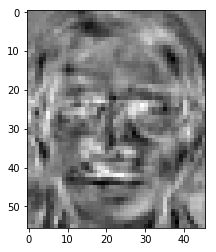

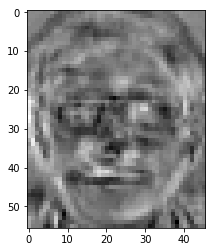

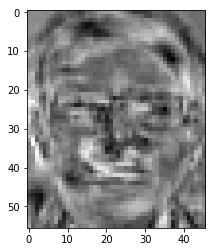

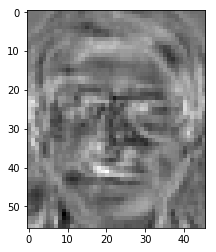

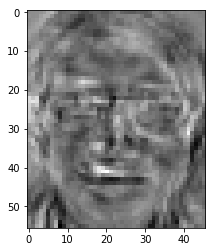

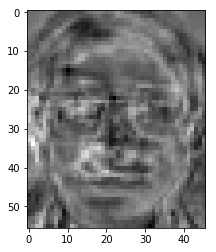

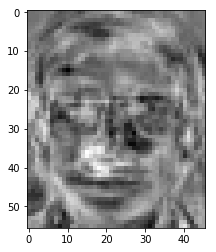

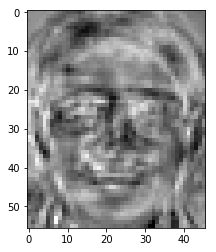

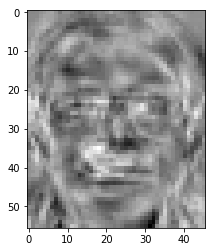

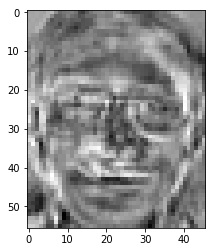

In [223]:
for i in range(10):
    img = v[:,:80].dot(np.abs(lda_vec[:,[i]])).reshape(56,46)
    plt.imshow(img, cmap='gray')
    plt.show()

In [80]:
p = []
for i in range(X_hat.shape[1]):
    p.append(v.T[0:80,:].dot(X_hat[:,i]))
p = np.array(p)

IndentationError: unexpected indent (<ipython-input-80-daac789714d0>, line 2)

In [230]:
lda_vec.shape

(80, 80)

In [226]:
v.T[:80,:].shape

(80, 2576)

In [258]:
L = lda_evec.dot(v.T[:80,:])
for i in range(T.shape[0]):
    T_prj = L.

In [247]:
T_hat = T-meanface
D_hat = D-meanface

In [251]:
T.shape[0]

120

In [257]:
L.shape

(80, 2576)

In [259]:
L.T.shape

(2576, 80)

In [260]:
T_hat.shape

(120, 2576)